In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data file
inp0=pd.read_csv("hour.csv")
inp0

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# Check for null values
inp0.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# Sanity check 1 - Check if registered + casual = cnt for all the records
np.sum((inp0.casual + inp0.registered) !=inp0.cnt)

0

In [5]:
# Sanity check 2 - Month values should be 1-12 only
np.unique(inp0.mnth)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [6]:
# Sanity check 3 - Hour should be 0-23
np.unique(inp0.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [7]:
# Cleaning data - 'casual' and 'registered' are redundant. 'instant' is index therefore irrelevant. 'dteday' won't be used in model building
cols_to_drop=['casual','registered','dteday','instant']
inp1=inp0.drop(cols_to_drop,axis=1).copy()

In [8]:
# Univariate analysis 1 - describe numerical fields
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:ylabel='Density'>

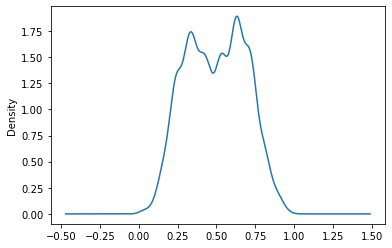

In [9]:
# Univariate analysis 2 - centrality and distribution (use density plot)
inp1.temp.plot.density()

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

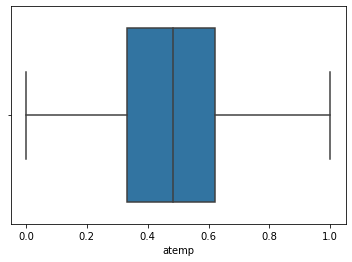

In [10]:
# Univariate analysis 3 - outlier check for 'atemp' (boxplot)
sns.boxplot(inp1.atemp)

<AxesSubplot:xlabel='hum', ylabel='Count'>

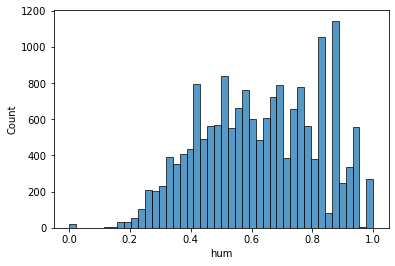

In [31]:
# Univariate analysis 4 - histogram for hum
sns.histplot(inp1.hum)

<AxesSubplot:ylabel='Density'>

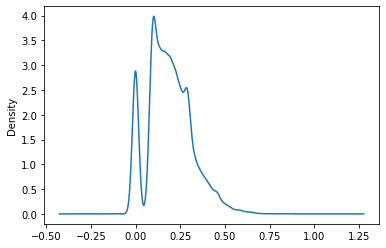

In [12]:
# Univariate analysis 5 - density plot for windspeed
inp1.windspeed.plot.density()

<AxesSubplot:ylabel='Density'>

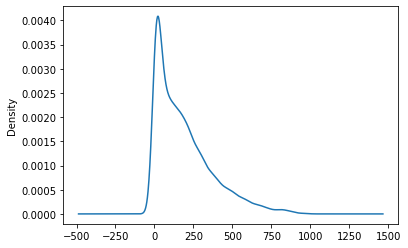

In [13]:
# Univariate analysis 6 - box and density plot for cnt
inp1.cnt.plot.density()

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

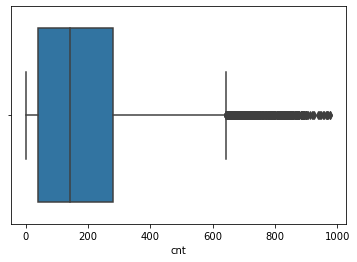

In [14]:
sns.boxplot(inp1.cnt)

In [15]:
# Outlier treatment
inp1.cnt.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.70    244.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [16]:
inp2=inp1[inp1.cnt<563].copy()

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

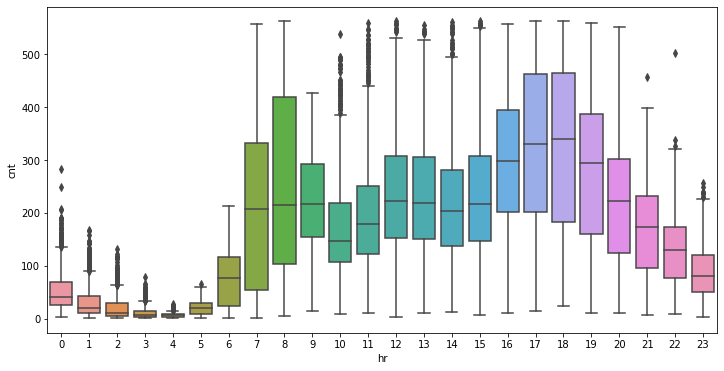

In [17]:
# Bi-variate analysis 1 - boxplot for cnt vs hr
plt.figure(figsize=(12,6))
sns.boxplot("hr", "cnt", data=inp2)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

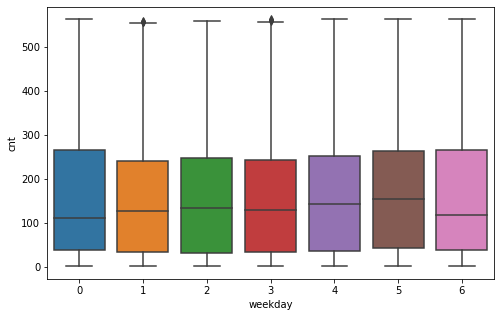

In [18]:
# Bi-variate analysis 2 - boxplot for cnt vs weekday
plt.figure(figsize=(8,5))
sns.boxplot("weekday","cnt",data=inp2)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

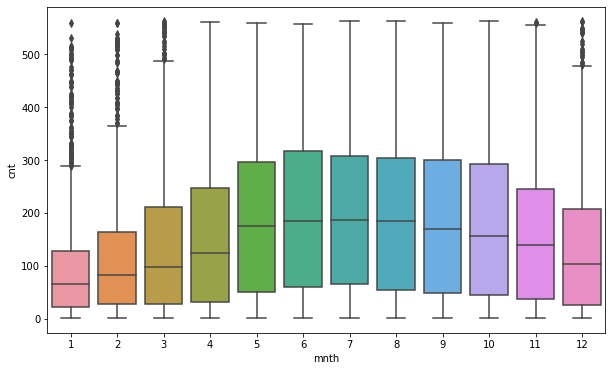

In [19]:
# Bi-variate analysis 3 - cnt vs month
plt.figure(figsize=(10,6))
sns.boxplot("mnth","cnt",data=inp2)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

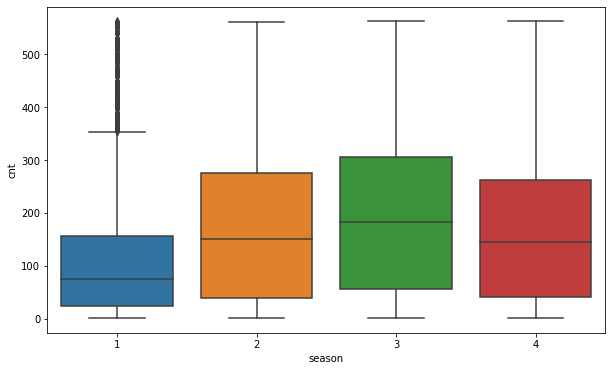

In [20]:
# Bi-variate analysis 4 - cnt vs season
plt.figure(figsize=(10,6))
sns.boxplot("season","cnt",data=inp2)

c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

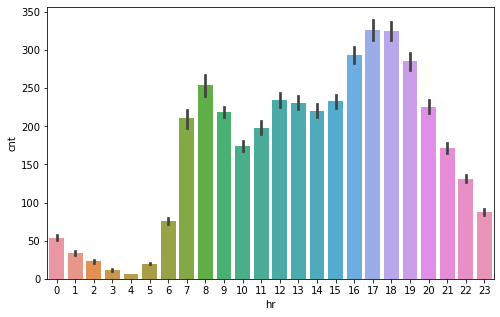

In [32]:
# Bi-variate analysis - cnt vs hr
plt.figure(figsize=(8,5))
sns.barplot("hr","cnt",data=inp2)

In [21]:
# Bi-variate analysis 6 - correlation matrix for 'atemp', 'temp', 'hum', 'windspeed'
num_vars=['atemp','temp','hum','windspeed']
corrs=inp2[num_vars].corr()
corrs

,atemp,temp,hum,windspeed
atemp,1.000000,0.988218,-0.025747,-0.073985
temp,0.988218,1.000000,-0.042603,-0.033209
hum,-0.025747,-0.042603,1.000000,-0.288648
windspeed,-0.073985,-0.033209,-0.288648,1.000000


<AxesSubplot:>

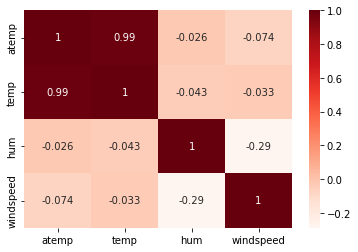

In [22]:
# Bi-variate analysis 6 - heatmap of the correlations
sns.heatmap(corrs, annot=True,cmap="Reds")

In [23]:
# Data pre-processing 1 - treating the 'mnth' column
inp3=inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])]=5
np.unique(inp3.mnth)


C:\Users\User\AppData\Local\Temp\ipykernel_7832\1249246428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.mnth[inp3.mnth.isin([5,6,7,8,9])]=5


array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [24]:
# Data pre-processing 2 - treating the 'hr' column
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11
np.unique(inp3.hr)

C:\Users\User\AppData\Local\Temp\ipykernel_7832\4058212422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
C:\Users\User\AppData\Local\Temp\ipykernel_7832\4058212422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11


array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [25]:
# Data pre-processing 3 - dummy columns for season, weathersit, weekday, mnth, hr
cat_cols=['season','weathersit','weekday','mnth','hr']
inp3=pd.get_dummies(inp3,columns=cat_cols,drop_first=True)
inp3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [33]:
inp3.shape

(16502, 41)

In [26]:
# Train test split - apply 70-30 split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [27]:
# Separate X and Y for df_train and df_test
y_train=df_train.pop("cnt")
x_train=df_train

y_test=df_test.pop("cnt")
x_test=df_test

In [28]:
# Model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
from sklearn.metrics import r2_score
y_train_pred=lr.predict(x_train)
r2_score(y_train,y_train_pred)

0.6702631986711078

In [30]:
# Making prediction on test set
y_test_ped=lr.predict(x_test)
r2_score(y_test,y_test_ped)

0.6645039631980879